# Image Classification

In [1]:
# 필요한 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [3]:
# train 데이터와 validation 데이터에서 개와고양이 이미지가 저장된 경로를 변수에 각각 저장
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation


In [4]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') 
print(train_cats_dir)

# directory with our training dog pictures 
train_dogs_dir = os.path.join(train_dir, 'dogs')  
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  
print(validation_dogs_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/train/dogs
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [5]:
# train 데이터와 validation 데이터의 개수 알아보기
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [6]:
# parameter Initialization
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [7]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [8]:
# train 데이터가 2천장으로 데이터 증강을 통해 데이터 수 늘리기
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True, 
                                     vertical_flip=False)

In [9]:
# .flow_from_directory를 사용해 파이프라인을 만들어 directory와 작업 환경 연결
# classification_mode: 개/고양이 분류 task이기 때문에 binary
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [10]:
# Data Augmentation 제대로 잘되었는지 확인
train_data_gen[0][0].shape

(16, 256, 256, 3)

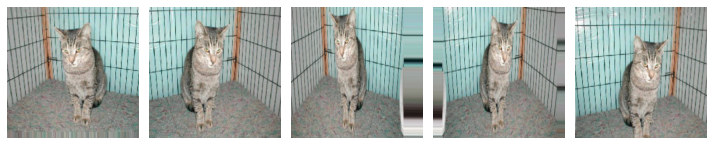

In [11]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [12]:
# Val 데이터에도 train 데이터와 같은 동일한 작업 수행 -> 데이터 스케일만 변경
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

In [13]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


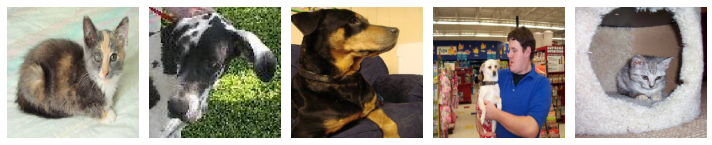

In [14]:
# Val 데이터 확인
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [15]:
_[:5] # 정답 데이터

array([0., 1., 1., 1., 0.], dtype=float32)

## 문제 1-1. VGG16 모델 구현하기

In [16]:
# 문제1-1. 이미지에 나온 VGG16 모델을 구현하세요.  
import tensorflow as tf

# VGG16 모델 구현
input_layer = tf.keras.layers.Input(shape=(256, 256, 3))

# Convolutional layers
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

# Fully connected layers
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# 모델 정의
model = tf.keras.Model(inputs=[input_layer], outputs=[output_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0     

In [17]:
# 손실 함수, optimizer, metric 설정
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

In [18]:
# 모델 학습
history = model.fit(
      train_data_gen,
      steps_per_epoch=int((len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size),
      epochs=epochs,
      validation_data=val_data_gen,
      validation_freq=1)

Epoch 1/5
125/125 [==============================] - 136s 579ms/step - loss: 11901564.0000 - binary_accuracy: 0.5025 - val_loss: 29.7601 - val_binary_accuracy: 0.5000
Epoch 2/5
125/125 [==============================] - 40s 315ms/step - loss: 11.0604 - binary_accuracy: 0.5180 - val_loss: 3.8461 - val_binary_accuracy: 0.5000
Epoch 3/5
125/125 [==============================] - 40s 315ms/step - loss: 10.1443 - binary_accuracy: 0.4950 - val_loss: 4.9709 - val_binary_accuracy: 0.5000
Epoch 4/5
125/125 [==============================] - 39s 312ms/step - loss: 2.3341 - binary_accuracy: 0.5030 - val_loss: 0.7256 - val_binary_accuracy: 0.5000
Epoch 5/5
125/125 [==============================] - 40s 315ms/step - loss: 0.8573 - binary_accuracy: 0.5060 - val_loss: 1.7509 - val_binary_accuracy: 0.5000


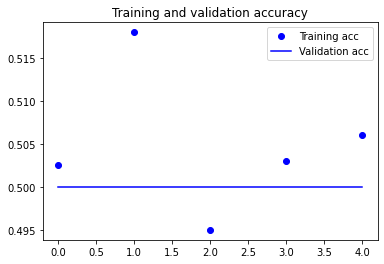

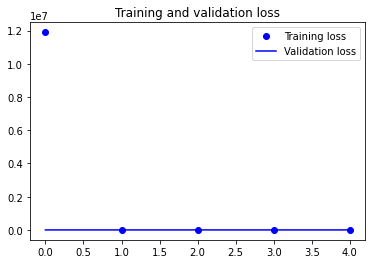

In [19]:
# 시각화 통해 정확도 확인
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- 성능이 좋지 않음

## 문제 1-2. 다양한 방법을 사용해 모델 성능 올리기

In [20]:
# 문제 1-2. hyperparameter 설정
batch_size = 32
epochs = 20
learning_rate = 0.001
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [21]:
# 문제 1-2. 데이터 generator 생성
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training data generator with augmentation
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(
    batch_size=batch_size,
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
# 문제 1-2. 모델 구현
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Add

# Pre-trained VGG16 모델 불러오기 (ImageNet weights 사용)
base_model = VGG16(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Custom top layers 추가 (skip connection 포함)
x = base_model.output
x = tf.keras.layers.Flatten()(x)
x1 = tf.keras.layers.Dense(512, activation='relu')(x)
x2 = tf.keras.layers.Dense(512, activation='relu')(x1)
x = Add()([x1, x2])  # skip connection
x = tf.keras.layers.Dense(256, activation='relu')(x)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# 모델 정의
model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
____________________________________________________________________________________________

In [23]:
# 문제 1-2. loss function, optimizer, metric 설정 및 모델 컴파일
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

# Loss function, optimizer, metric 설정 및 모델 컴파일
loss_function = tf.keras.losses.binary_crossentropy
optimizer = SGD(learning_rate=learning_rate, momentum=0.9)
metric = tf.keras.metrics.binary_accuracy

model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=[metric])

# Callback 설정 (EarlyStopping)
callbacks_list = [EarlyStopping(monitor='val_loss', patience=5)]

In [24]:
# 모델 학습
history = model.fit(
    train_data_gen,
    steps_per_epoch=len(train_data_gen),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=len(val_data_gen),
    callbacks=callbacks_list,
    validation_freq=1
)

Epoch 1/20
63/63 [==============================] - 40s 560ms/step - loss: 0.6691 - binary_accuracy: 0.5815 - val_loss: 0.5129 - val_binary_accuracy: 0.7480
Epoch 2/20
63/63 [==============================] - 31s 487ms/step - loss: 0.5544 - binary_accuracy: 0.6995 - val_loss: 0.3654 - val_binary_accuracy: 0.8490
Epoch 3/20
63/63 [==============================] - 31s 487ms/step - loss: 0.4496 - binary_accuracy: 0.7880 - val_loss: 0.3241 - val_binary_accuracy: 0.8670
Epoch 4/20
63/63 [==============================] - 31s 486ms/step - loss: 0.3786 - binary_accuracy: 0.8335 - val_loss: 0.2848 - val_binary_accuracy: 0.8750
Epoch 5/20
63/63 [==============================] - 31s 490ms/step - loss: 0.4266 - binary_accuracy: 0.7930 - val_loss: 0.2818 - val_binary_accuracy: 0.8810
Epoch 6/20
63/63 [==============================] - 31s 491ms/step - loss: 0.4136 - binary_accuracy: 0.8045 - val_loss: 0.3006 - val_binary_accuracy: 0.8660
Epoch 7/20
63/63 [==============================] - 32s 50

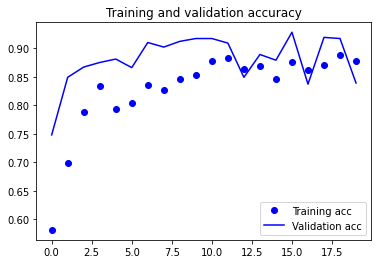

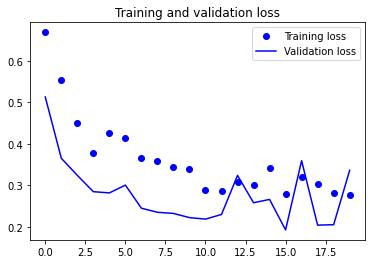

In [25]:
# 학습 결과 시각화
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
# 최종 Training Accuracy와 Validation Accuracy 출력
final_training_acc = acc[-1]
final_validation_acc = val_acc[-1]

print(f"Final Training Accuracy: {final_training_acc:.4f}")
print(f"Final Validation Accuracy: {final_validation_acc:.4f}")

# 최종 Training Loss 및 Validation Loss 출력
final_training_loss = loss[-1]
final_validation_loss = val_loss[-1]

print(f"Final Training Loss: {final_training_loss:.4f}")
print(f"Final Validation Loss: {final_validation_loss:.4f}")

Final Training Accuracy: 0.8770
Final Validation Accuracy: 0.8390
Final Training Loss: 0.2765
Final Validation Loss: 0.3362


# Object Detection

In [27]:
# 필요한 라이브러리 불러오기
!pip3 install tensorflow-estimator==2.6.0

In [28]:
# Tensorflow와 Tensoflow Hub에 있는 이미 학습된 모델을 활용하기 위한 모듈 
import tensorflow as tf
import tensorflow_hub as hub

# 이미지를 다운로드하는 데에 사용하는 모듈
import matplotlib.pyplot as plt
import tempfile 
from six.moves.urllib.request import urlopen
from six import BytesIO

# 이미지에 선과 폰트를 넣기 위한 모듈
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# Detection하는 데에 소요된 시간을 점검하기 위한 모듈
import time

In [29]:
# 이미지 시각화 함수 만들기
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)

In [30]:
# 원하는 이미지 다운로드하고 정해진 가로, 세로 길이에 맞게 이미지 resizing
def download_and_resize_image(url, new_width=256, new_height=256, display=False): 
  
  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)  # 이미지 읽기
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS) # 이미지 조정
  pil_image_rgb = pil_image.convert("RGB") #RBG로 변환
  pil_image_rgb.save(filename, format="JPEG", quality=90) # 이미지 저장
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename

In [31]:
# BBOX 만드는 함수
def draw_bounding_box_on_image(image, 
                               ymin, xmin, ymax, xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)

# BBox 테두리 그리기
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
  
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height
  
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin

In [32]:
# 이미지 위에 class 이름과 score 나타내는 함수
# BBox 그리기
def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1): 
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

# BBox 그리기 적용
  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])  # 박스 좌표값
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

Image downloaded to /tmp/tmpza3mo36h.jpg.


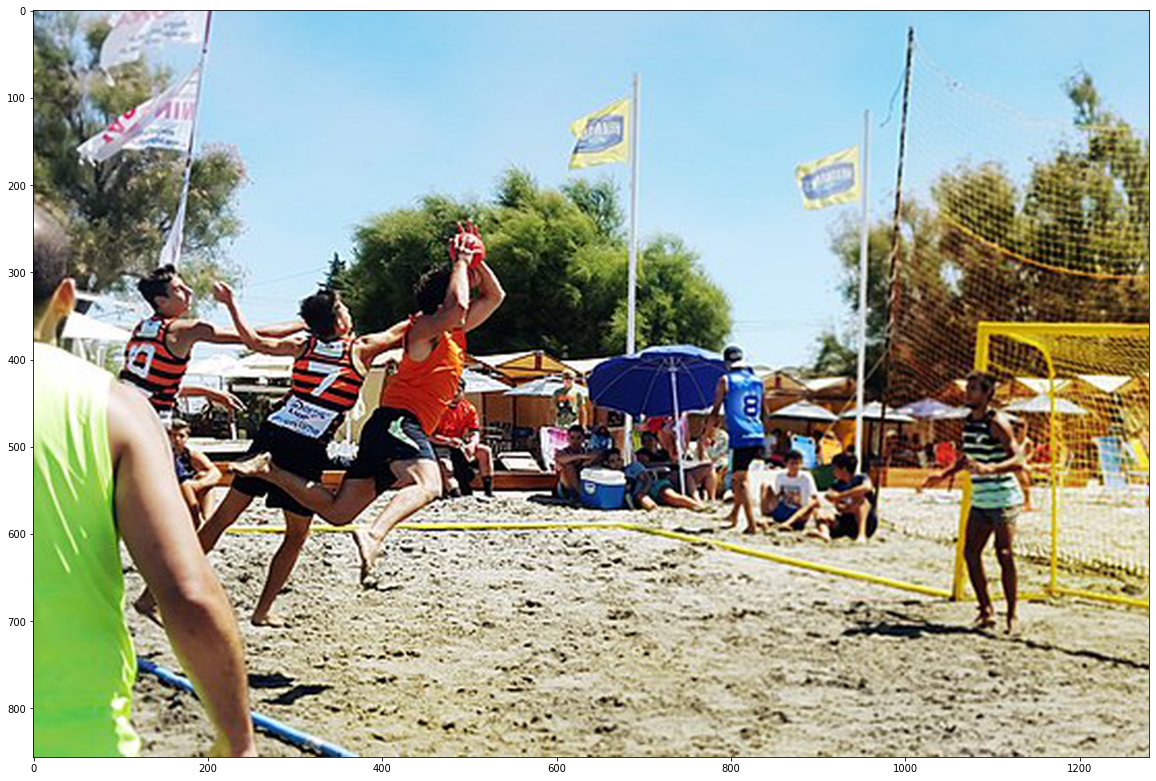

In [33]:
# 이미지 불러오기
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Torneo_beach_handball.jpg/640px-Torneo_beach_handball.jpg"
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)  # new_width와 new_height를 변경해 보세요.

In [34]:
# tfhub에서 사전 학습된(Pre-trained) InceptionResnet 모델을 사용한 Faster RCNN 모델을 불러오기
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"  

detector = hub.load(module_handle).signatures['default'] # detector에 사용할 모듈 저장

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [35]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [36]:
# Detector 실행하는 함수
def run_detector(detector, path):
  img = load_img(path) 

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

# 소요시간 측정
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

# 이미지 추론 개수와 추론 시간 출력
  print("Found %d objects." % len(result["detection_scores"]))
  print("Inference time: ", end_time-start_time)

# 이미지 내 박스로 entity, scores를 추가하여 출력
  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])

  display_image(image_with_boxes)

Found 100 objects.
Inference time:  40.781524896621704


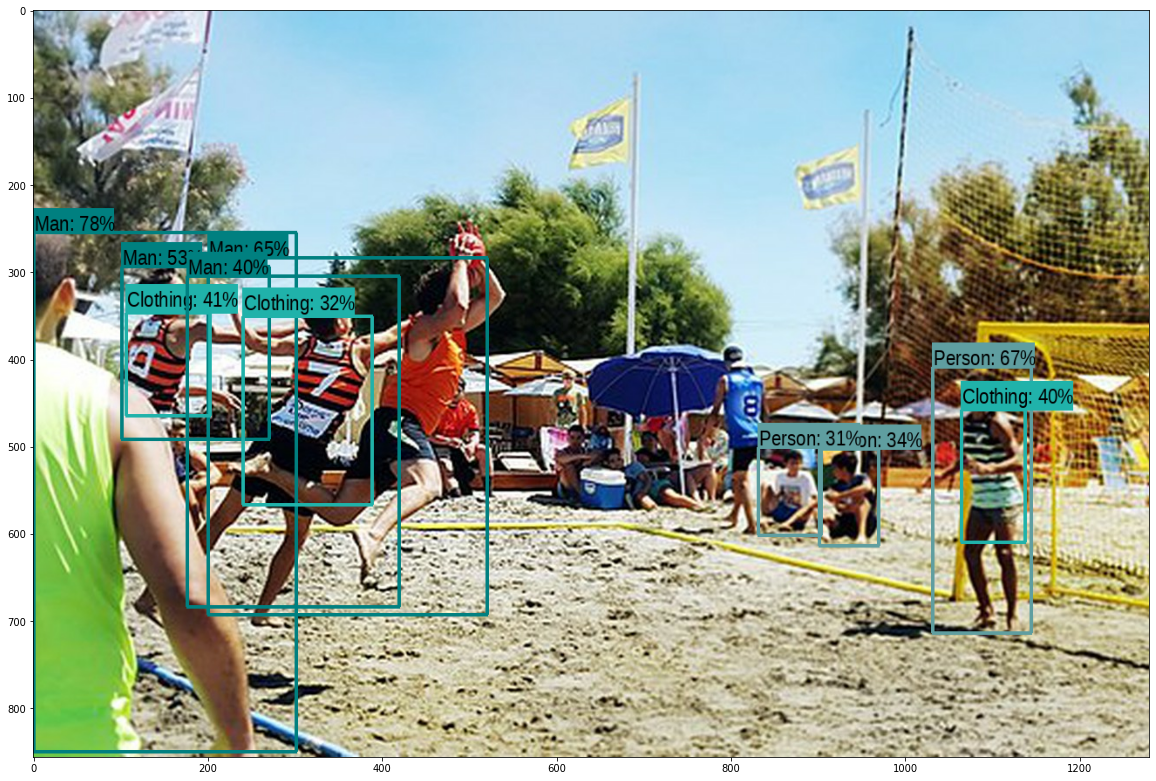

In [37]:
# Detector 실행
run_detector(detector, downloaded_image_path)

## 문제 2-1. 다른 이미지 테스트해보기

Image downloaded to /tmp/tmp_uuj98ao.jpg.


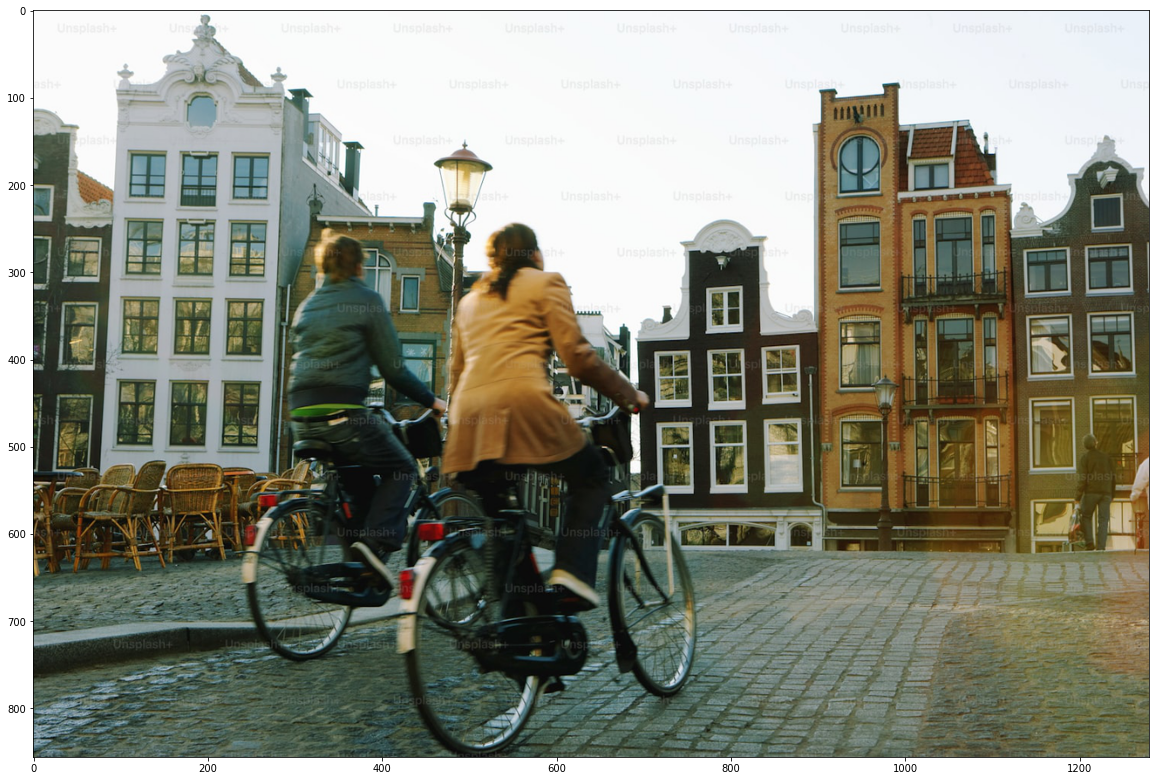

In [38]:
# 이미지 불러오기
image_url = "https://plus.unsplash.com/premium_photo-1664303000625-9da917c7fcfe?q=80&w=1470&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Found 100 objects.
Inference time:  37.586254358291626


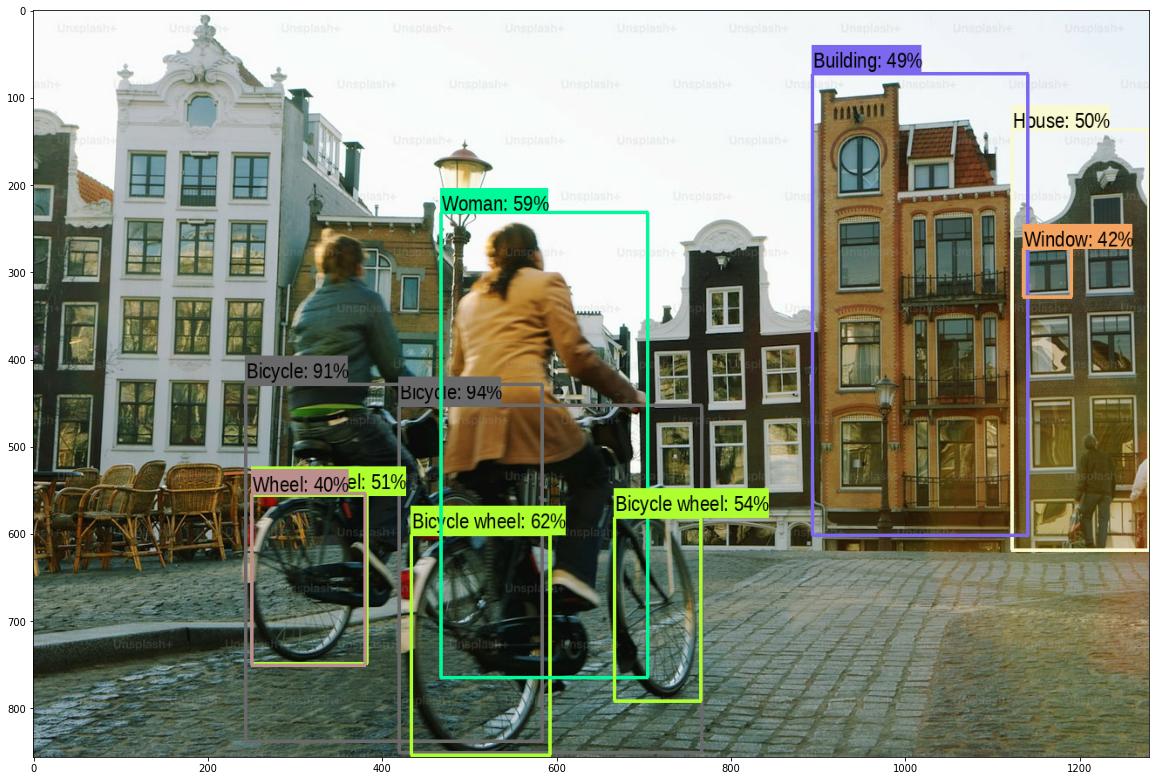

In [39]:
# TensorFlow Hub 모듈 로드
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"  
detector = hub.load(module_handle).signatures['default']

# 이미지 로드 함수
def load_img(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    return img

# 객체 탐지 함수
def run_detector(detector, path):
    img = load_img(path)
    converted_img = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

    start_time = time.time()
    result = detector(converted_img)
    end_time = time.time()

    result = {key: value.numpy() for key, value in result.items()}

    print("Found %d objects." % len(result["detection_scores"]))
    print("Inference time: ", end_time - start_time)

    image_with_boxes = draw_boxes(img.numpy(), result["detection_boxes"], result["detection_class_entities"], result["detection_scores"])

    display_image(image_with_boxes)

# 테스트 실행
run_detector(detector, downloaded_image_path)

## 문제 2-2. 다양한 pre-trained model 테스트해보기

### 2번째 모델: SSD MobileNet v2

In [40]:
# 문제 2-2. 모델 불러오기
ssd_mobilenet_module_handle = "https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1"
detector_ssd_mobilenet = hub.load(ssd_mobilenet_module_handle).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Running SSD MobileNet...
Found 100 objects.
Inference time:  8.768931865692139


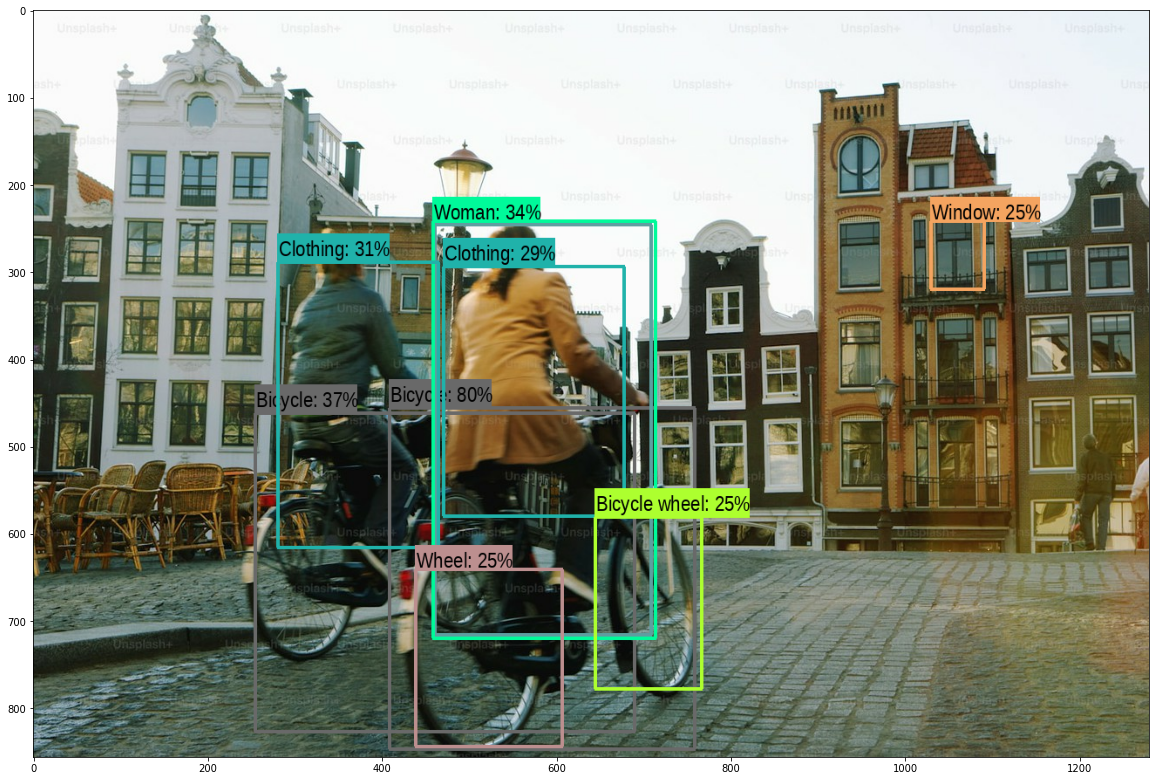

In [41]:
# 문제 2-2. 테스트 
print("Running SSD MobileNet...")
run_detector(detector_ssd_mobilenet, downloaded_image_path)

In [42]:
# 문제 2-2. 결과 비교
print("1번째 모델인 Inception ResNet을 사용한 Faster RCNN은 조금 느리지만 높은 정확성을 보였습니다.") 
print("2번째 모델인 SSD MobileNet v2는 속도가 빠르지만 정확도는 낮았습니다.")

1번째 모델인 Inception ResNet을 사용한 Faster RCNN은 조금 느리지만 높은 정확성을 보였습니다.
2번째 모델인 SSD MobileNet v2는 속도가 빠르지만 정확도는 낮았습니다.


- 첫 번째 모델이 조금 느리지만 높은 정확성을 보였던 것에 비해 2번째 모델인 SSD는 속도는 빨랐지만 정확도가 상대적으로 낮았음